In [490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import json
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns
import random
import os
import pickle
from scipy.interpolate import interp1d
from scipy.optimize import brentq
from sklearn import metrics
import os

In [491]:
pd.read_csv('/Users/avinashkumarchaurasia/Desktop/project/BrainModels/Results/Lee2019/Experiments/Multi_Session/Siamese/Open_Set.csv').groupby(['dataset','evaluation', 'eval Type','pipeline']).agg({
                "subject": 'nunique',
                #'n_samples': 'first',
                #'accuracy': 'mean',
                #'auc': 'mean',
                #'eer': lambda x: f'{np.mean(x)*100:.2f} ± {np.std(x)*100:.2f}',
                'eer': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.01_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()

,dataset,evaluation,eval Type,pipeline,subject,eer,frr_1_far,frr_0.1_far,frr_0.01_far
0,Lee2019_ERP,Multi Session,Open Set,siamese,54,20.680,72.611,86.704,89.500


================================================================================================================

<H1>Epochs Interval</H1>

================================================================================================================


## Effect of Epochs Interval

Under this Experiment, we analyze the effect of different epochs duration on the performance of our authentication systems across all the datasets. We tested the epochs duration of 1 seconds (-0.2 to 0.8), 1.2 seconds (-0.2 to 1.0), 1.4 seconds (-0.2 to 1.2), 1.6 seconds (-0.2 to 1.4), 1.8 seconds (-0.2 to 1.6) and 2.0 (-0.2 to 1.8). Below Parameters were applied for conducting this experiment

<H3>Datasets</H3>

BrainInvaders15a, ERPCORE: N400, ERPCORE: N400, Mantegna2019, COG-BCI Flanker, Lee2019, Won2022,     Huebner2017, Sosulski2019

<H3>Utilized Parameters:</H3>

•   Filtering: Band Pass Filtering (1 to 50 Hz)

•   Epoch Interval: [-0.2, 0.8], [-0.2, 1.0], [-0.2, 1.2], [-0.2, 1.4], [-0.2, 1.6], [-0.2, 1.8]. 

•   Baseline Correction Applied: Yes

•   Epochs Rejection threshold: No Epochs Rejection

•   Features: AR (order=1), PSD

•   Classifiers: LDA, SVM, KNN, RF, NB, LR, Siamese 

•   Evaluation Type: Single-Session Evaluation

•   Threat Case: Open-Set


In [492]:
main_dir=os.path.dirname(os.getcwd())
results_dir=os.path.join(main_dir, "Results")
brainInvaders_dir=os.path.join(results_dir, "BrainInvaders15a", 'Experiments')
COG_BCI_Flanker_dir=os.path.join(results_dir, "COG_BCI_Flanker", 'Experiments')
ERPCORE_N400_dir=os.path.join(results_dir, "ERPCORE_N400", 'Experiments')
ERPCORE_P300_dir=os.path.join(results_dir, "ERPCORE_P300", 'Experiments')
Huebner_LLP_dir=os.path.join(results_dir, "Huebner_LLP", 'Experiments')
Mantegna2019_dir=os.path.join(results_dir, "Mantegna2019", 'Experiments')
Sosulski2019_dir=os.path.join(results_dir, "Sosulski2019", 'Experiments')
Won2022_dir=os.path.join(results_dir, "Won2022", 'Experiments')
lee2019_dir=os.path.join(results_dir, "Lee2019", 'Experiments')

### Reading the results of dataset BrainInvaders15a

In [493]:
brain_shallow_classifiers_db=pd.read_csv(os.path.join(brainInvaders_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))
siamese_path=os.path.join(brainInvaders_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
brain_interval_siamese_df = pd.concat(dfs, ignore_index=True)

brain_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)
#brain_interval_siamese_df

In [494]:
#brain_shallow_classifiers_db

### Reading the results of dataset ERPCORE:N400


In [495]:
erpcoreN400_shallow_classifiers_db=pd.read_csv(os.path.join(ERPCORE_N400_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(ERPCORE_N400_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
erpCore_N400_interval_siamese_df = pd.concat(dfs, ignore_index=True)  
erpCore_N400_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)

#brain_interval_siamese_df

### Reading the results of dataset ERPCORE:P300


In [496]:
erpcoreP300_shallow_classifiers_db=pd.read_csv(os.path.join(ERPCORE_P300_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(ERPCORE_P300_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
erpCore_P300_interval_siamese_df = pd.concat(dfs, ignore_index=True) 
erpCore_P300_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)

#brain_interval_siamese_df

### Reading the results of dataset COGBCI Flanker


In [497]:
cogbci_shallow_classifiers_db=pd.read_csv(os.path.join(COG_BCI_Flanker_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(COG_BCI_Flanker_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
cogbci_interval_siamese_df = pd.concat(dfs, ignore_index=True) 
cogbci_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)

#brain_interval_siamese_df

### Reading the results of dataset Huebner2017


In [498]:
huebner_shallow_classifiers_db=pd.read_csv(os.path.join(Huebner_LLP_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(Huebner_LLP_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
huebner_interval_siamese_df = pd.concat(dfs, ignore_index=True)  
huebner_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)

#brain_interval_siamese_df



### Reading the results of dataset Sosulski2019


In [499]:
sosulski_shallow_classifiers_db=pd.read_csv(os.path.join(Sosulski2019_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(Sosulski2019_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
sosulski_interval_siamese_df = pd.concat(dfs, ignore_index=True)  
sosulski_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)


#brain_interval_siamese_df



### Reading the results of dataset Mantegna2019


In [500]:
mantegna_shallow_classifiers_db=pd.read_csv(os.path.join(Mantegna2019_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(Mantegna2019_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
mantegna_interval_siamese_df = pd.concat(dfs, ignore_index=True)  
mantegna_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)

#brain_interval_siamese_df

### Reading the results of dataset Won2022


In [501]:
won2022_shallow_classifiers_db=pd.read_csv(os.path.join(Won2022_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))


siamese_path=os.path.join(Won2022_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
won2022_interval_siamese_df = pd.concat(dfs, ignore_index=True)  
#brain_interval_siamese_df

### Reading the results of dataset Lee2019

In [502]:
lee2019_shallow_classifiers_db=pd.read_csv(os.path.join(lee2019_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

In [503]:
df_epochs_interval_db=pd.concat([brain_shallow_classifiers_db, brain_interval_siamese_df,
                                 erpcoreN400_shallow_classifiers_db, erpCore_N400_interval_siamese_df,  
                                 erpcoreP300_shallow_classifiers_db, erpCore_P300_interval_siamese_df, 
                                    cogbci_shallow_classifiers_db, cogbci_interval_siamese_df,  
                                 huebner_shallow_classifiers_db, huebner_interval_siamese_df,  
                                 sosulski_shallow_classifiers_db, sosulski_interval_siamese_df, 
                                    mantegna_shallow_classifiers_db, mantegna_interval_siamese_df, 
                                 won2022_shallow_classifiers_db, won2022_interval_siamese_df,
                                lee2019_shallow_classifiers_db], axis=0)

In [504]:
#df_epochs_interval_db.pipeline.unique()

In [505]:
df_epochs_interval_db.drop(columns=['evaluation', 'Unnamed: 0'], inplace=True)

In [506]:
#df_shallow_classifiers

In [507]:
df_epochs_interval_db['pipeline'] = df_epochs_interval_db['pipeline'].apply(lambda x: x.split('+')[-1])


In [508]:
df_epochs_interval_db.pipeline.unique()

array(['SVM', 'LR', 'LDA', 'NB', 'KNN', 'RF', 'siamese'], dtype=object)

In [509]:
df_epochs_interval_db.dataset.unique()

array(['Brain Invaders 2015a', 'erpcore n400', 'erpcore p300',
       'COG-BCI Flanker', 'Visual Speller LLP', 'Spot Pilot P300 dataset',
       'mantegna 2019', 'won 2022', 'Lee2019_ERP'], dtype=object)

In [510]:
df_epochs_interval_db['dataset'].replace({'Visual Speller LLP': "Huebner2017", 'Spot Pilot P300 dataset':'Sosulski2019'}, inplace=True)

In [511]:
#df_epochs_interval_db[['pipeline', 'dataset']].value_counts()
#df_epochs_interval_db[df_epochs_interval_db['pipeline']=='Siamese']
df_epochs_interval_db['pipeline'].replace({'siamese':'TNN'}, inplace=True)


### Grouping the results of Epochs Duration

In [512]:
#df_sample_size.head()
grouped_epochs_interval_df=df_epochs_interval_db.groupby(['dataset', 'pipeline','epochs_duration']).agg({
                #'accuracy': 'mean',
                'eer': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.01_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()

#grouped_epochs_interval_df.pipeline.unique()

In [513]:
#grouped_epochs_interval_df.pipeline.unique()
#gr

grouped_epochs_interval_df['dataset'].replace({'Brain Invaders 2015a': 'BrainInvaders2015a',
                                              'COG-BCI Flanker': 'COG_BCI_Flanker',
                                               'Huebner2017': 'Huebner_LLP',
                                               'Lee2019_ERP': 'Lee2019',
                                               'erpcore n400': 'ERPCORE_N400',
                                               'erpcore p300': 'ERPCORE_P300',
                                               'mantegna 2019':'Mantegna2019',
                                               'won 2022': 'Won2022'}, inplace=True)

### Visualzing all the results of Eochs duration in subplots

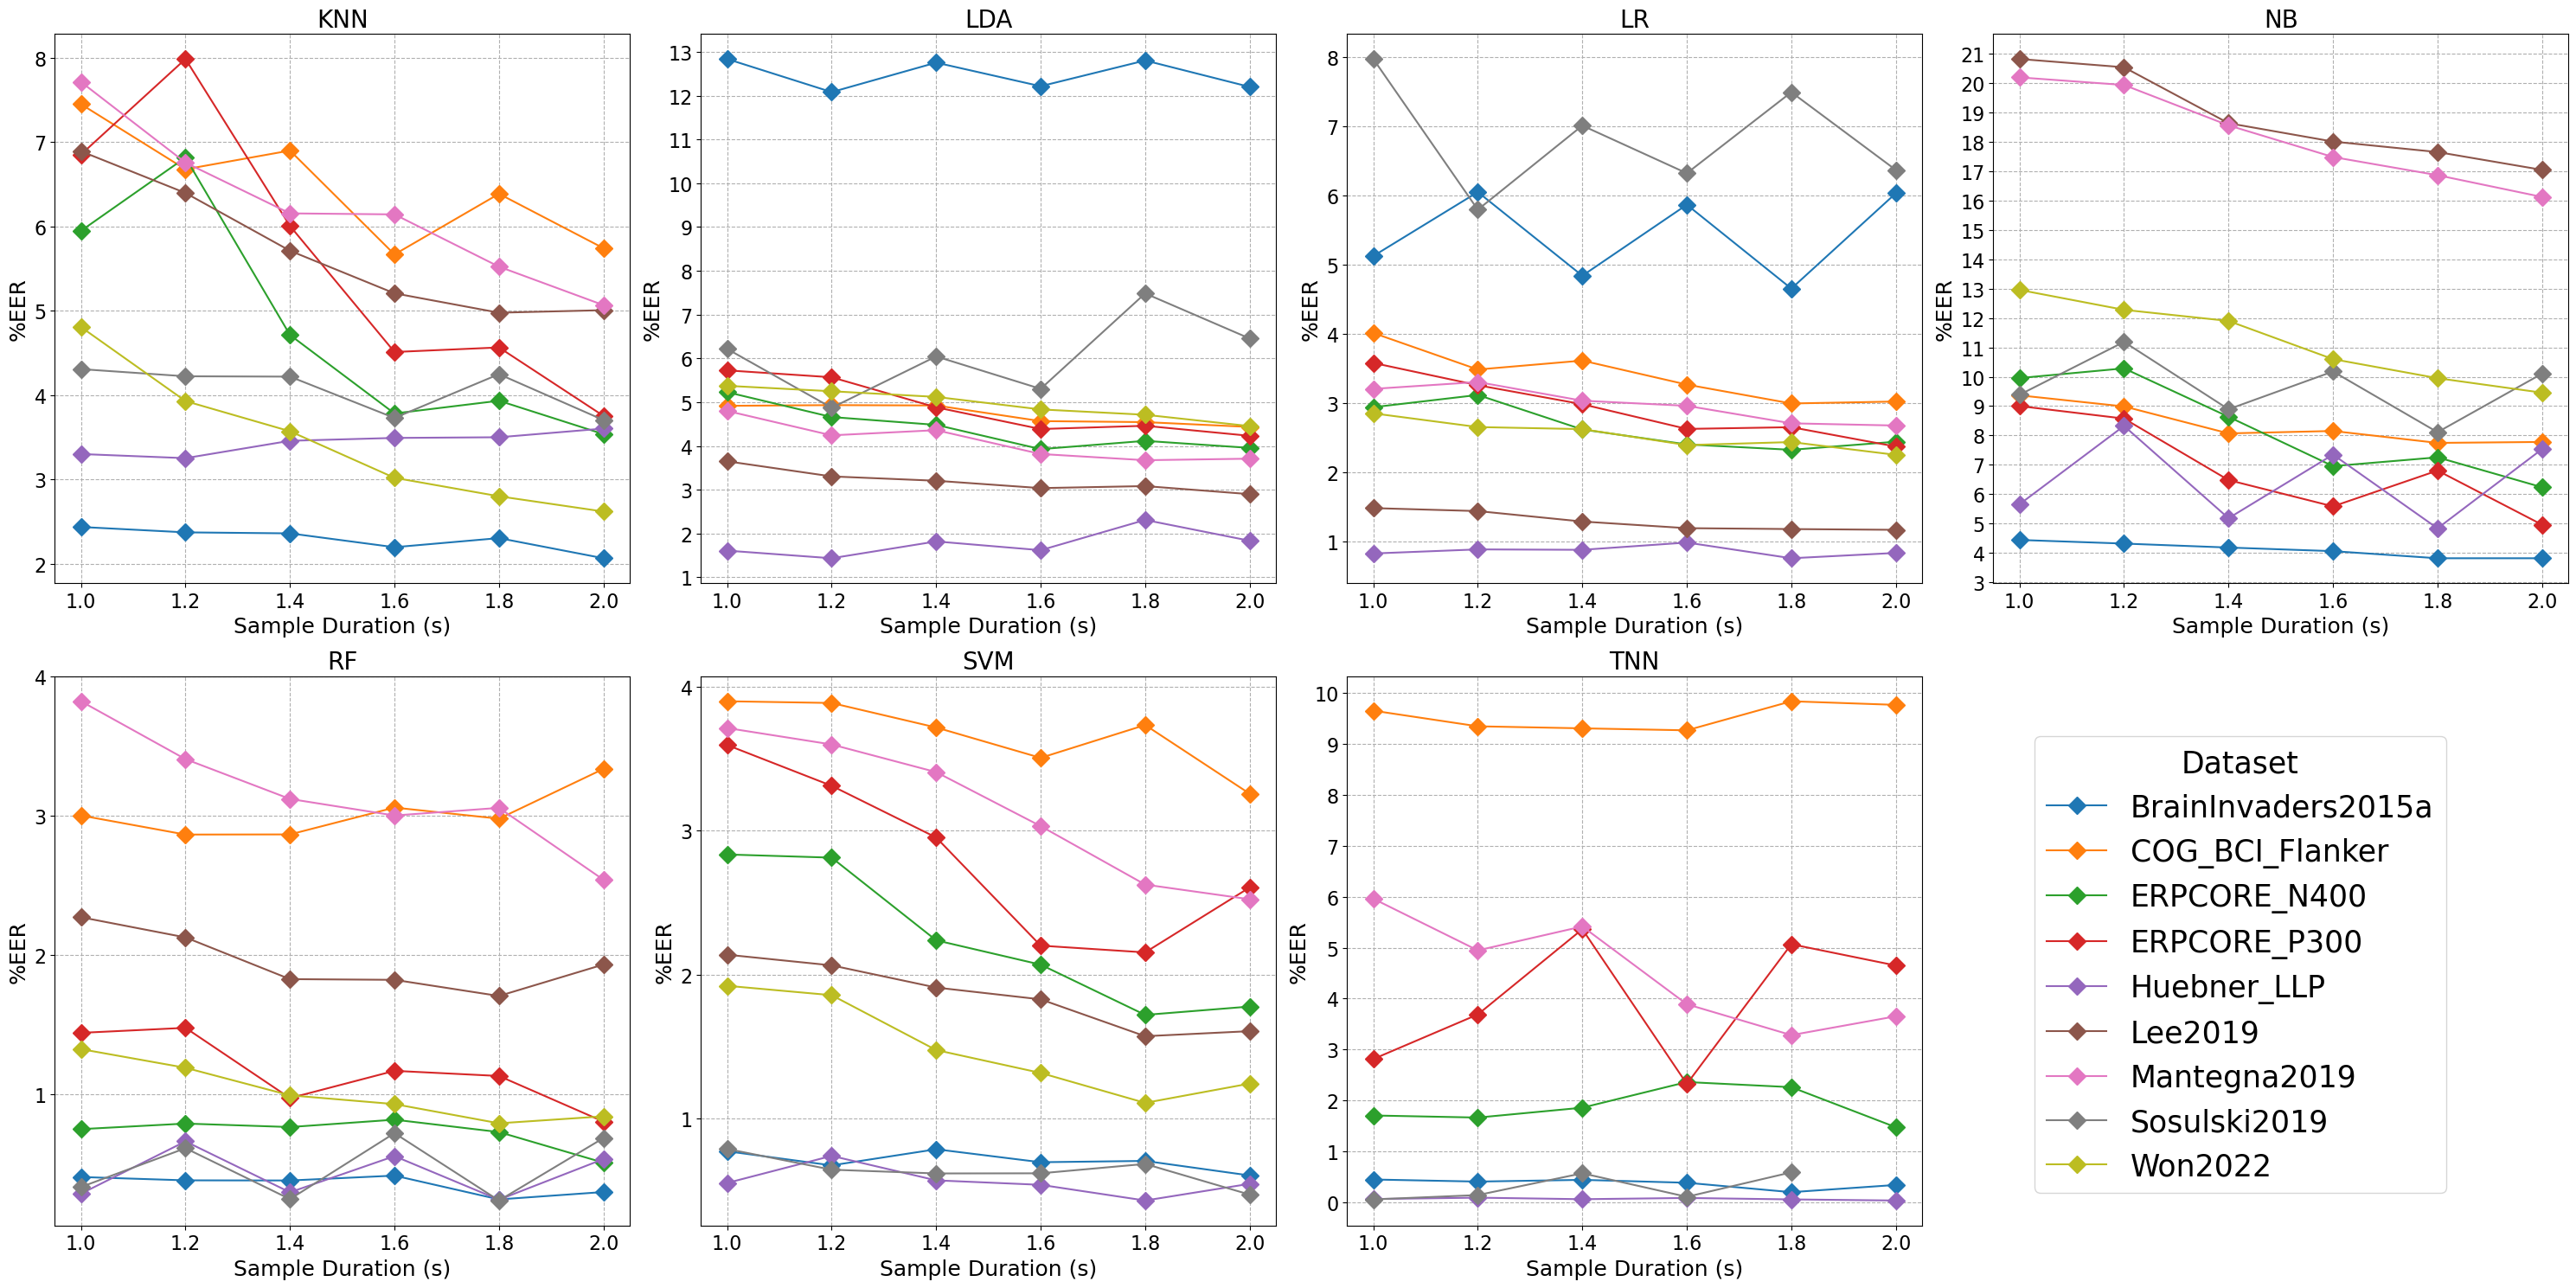

In [514]:
#import matplotlib.pyplot as plt

# Create subplots for each pipeline
fig, axs = plt.subplots(2, 4, figsize=(30, 15))
fig.tight_layout(pad=3.0)

# Flatten the 2D array of subplots for easy iteration
axs = axs.flatten()

# Create an empty list to store legend handles and labels
legend_handles = []

# Define dataset colors
dataset_colors = {
    'BrainInvaders2015a': 'blue',  # Dark blue
    'COG_BCI_Flanker': '#ff7f0e',  # Dark orange
    'ERPCORE_N400': '#DDCC77',  # Dark brown
    'ERPCORE_P300': '#e377c2',  # Dark pink
    'Huebner_LLP': '#2ca02c',  # Dark green
    'Lee2019': '#d62728',  # Dark red
    'Mantegna2019': '#7f7f7f',  # Dark gray
    'Sosulski2019': '#80b1d3',  # Dark purple
    'Won2022': '#bc80bd'  # Olive
}

legend_order = ["BrainInvaders2015a", "COG_BCI_Flanker", "ERPCORE_N400", "ERPCORE_P300", "Huebner_LLP", "Lee2019", "Mantegna2019", "Sosulski2019", "Won2022"]

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_epochs_interval_df.pipeline.unique()):
    if i < len(axs):
        db = grouped_epochs_interval_df[grouped_epochs_interval_df['pipeline'] == pipeline]
        db['eer'] = db['eer'].astype('float64')

        # Choose the subplot for the current pipeline
        ax = axs[i]

        for dataset in legend_order:
            dataset_data = db[db['dataset'] == dataset]
            line, = ax.plot(dataset_data['epochs_duration'], dataset_data['eer'], marker='D', 
                            markersize=10, label=dataset)
            legend_handles.append(line)

        # Set labels and title
        ax.set_xlabel('Sample Duration (s)', fontsize=18)
        ax.set_ylabel('%EER', fontsize=18)
        ax.set_title(pipeline, fontsize=20)

        # Increase the font size of x-axis and y-axis values
        ax.tick_params(axis='both', labelsize=16)

        # Set y-axis ticks at intervals of 1
        ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
        ax.grid(True, ls="--", lw=0.8)

# Create a legend outside the subplots
fig.legend(legend_handles, legend_order, bbox_to_anchor=(0.95, 0.44), fontsize=12, prop={'size': 25}, title="Dataset", title_fontsize=25)
plt.subplots_adjust(right=0.80)  # Adjust layout to make room for the legend

# Adjust layout
plt.tight_layout()
fig.delaxes(axs[7])
plt.savefig('/Users/avinashkumarchaurasia/Desktop/project/BrainModels/Plots/Experiment_Pre_Processing/Epochs_Interval/Effects_of_Epochs_Duration.pdf', bbox_inches="tight")
plt.show()


================================================================================================================

<H1>Epochs Rejection</H1>

================================================================================================================


## Effects of Epochs Rejection


Under this Experiment, we analyze the effect of different epochs Rejection on the performance of our authentication systems across all the datasets. We tested the epochs Rejection such as 100, 150, 200, 250, 300, 350 and 400. Below Parameters were applied for conducting this experiment

<H3>Datasets</H3>

BrainInvaders15a, ERPCORE: N400, ERPCORE: N400, Mantegna2019, COG-BCI Flanker, Lee2019, Won2022,     Huebner2017, Sosulski2019

<H3>Utilized Parameters:</H3>

•   Filtering: Band Pass Filtering (1 to 50 Hz)

•   Epoch Interval: [-0.2, 0.8]

•   Baseline Correction Applied: Yes

•   Epochs Rejection threshold: 100, 150, 200, 250, 300, 350, 400

•   Features: AR (order=1), PSD

•   Classifiers: LDA, SVM, KNN, RF, NB, LR, Siamese 

•   Evaluation Type: Single-Session Evaluation

•   Threat Case: Open-Set

### Reading the results of dataset BrainInvaders15a

In [515]:
brain_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(brainInvaders_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))
siamese_results_path=os.path.join(brainInvaders_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
brain_siamese_df = pd.concat(dfs, ignore_index=True)                    

### Reading the results of dataset ERPCORE:N400

In [516]:
erpcCoreN400_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(ERPCORE_N400_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(ERPCORE_N400_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
erpCore_N400_siamese_df = pd.concat(dfs, ignore_index=True) 

### Reading the results of dataset ERPCORE:P300

In [517]:
erpcCoreP300_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(ERPCORE_P300_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(ERPCORE_P300_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
erpCore_P300_siamese_df = pd.concat(dfs, ignore_index=True) 

### Reading the results of dataset COGBCI-Flanker

In [518]:
cogbci_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(COG_BCI_Flanker_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(COG_BCI_Flanker_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension

print(os.listdir(siamese_results_path))
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
cogbci_siamese_df = pd.concat(dfs, ignore_index=True) 

['no_threshold_Results.csv', '200_threshold_Results.csv', '250_threshold_Results.csv', '100_threshold_Results.csv', '400_threshold_Results.csv', '350_threshold_Results.csv']


### Reading the results of dataset  Huebner2017

In [519]:
huebner_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(Huebner_LLP_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(Huebner_LLP_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
huebner_siamese_df = pd.concat(dfs, ignore_index=True)
#huebner_siamese_df

### Reading the results of dataset Sosulski2019

In [520]:
Soluski_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(Sosulski2019_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(Sosulski2019_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
sosulski_siamese_df = pd.concat(dfs, ignore_index=True) 

### Reading the results of dataset Mantegna2019

In [521]:
mantegna_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(Mantegna2019_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(Mantegna2019_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
mantgena_siamese_df = pd.concat(dfs, ignore_index=True) 

### Reading the results of dataset Won2022

In [522]:
won2022_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(Won2022_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(Won2022_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
won2022_siamese_df = pd.concat(dfs, ignore_index=True) 

### Reading the results of Lee2019 

In [523]:
lee_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(lee2019_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

# siamese_results_path=os.path.join(Won2022_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# # List all files in the folder with a .csv extension
# csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# # Initialize an empty list to store DataFrames
# dfs = []

# # Iterate over each CSV file and read it into a DataFrame
# for csv_file in csv_files:
#     file_path = os.path.join(siamese_results_path, csv_file)
#     df = pd.read_csv(file_path)
#     dfs.append(df)

# # Concatenate all DataFrames into a single DataFrame
# won2022_siamese_df = pd.concat(dfs, ignore_index=True) 

In [524]:
df_epochs_rejection_db=pd.concat([brain_epochsRejection_shallow_classifiers_db, brain_siamese_df,
                                  erpcCoreN400_epochsRejection_shallow_classifiers_db, erpCore_N400_siamese_df,
                                    erpcCoreP300_epochsRejection_shallow_classifiers_db, erpCore_P300_siamese_df,
                                    cogbci_epochsRejection_shallow_classifiers_db, cogbci_siamese_df,
                                  huebner_epochsRejection_shallow_classifiers_db, huebner_siamese_df, 
                                      Soluski_epochsRejection_shallow_classifiers_db, sosulski_siamese_df,
                                    mantegna_epochsRejection_shallow_classifiers_db, mantgena_siamese_df, 
                                  won2022_epochsRejection_shallow_classifiers_db,won2022_siamese_df, 
                                 lee_epochsRejection_shallow_classifiers_db], axis=0)

In [525]:
#df_epochs_rejection_db

In [526]:
df_epochs_rejection_db.drop(columns=['evaluation', 'Unnamed: 0'], inplace=True)
df_epochs_rejection_db['pipeline'] = df_epochs_rejection_db['pipeline'].apply(lambda x: x.split('+')[-1])
df_epochs_rejection_db['pipeline'].replace({'siamese':'TNN'}, inplace=True)
df_epochs_rejection_db['dataset'].replace({'Visual Speller LLP': "Huebner2017", 'Spot Pilot P300 dataset':'Sosulski2019'}, inplace=True)

### Grouping the results of Epochs Rejection

In [527]:
#df_sample_size.head()
grouped_epochs_rejection_df=df_epochs_rejection_db.copy()
grouped_epochs_rejection_df['eer_std'] = df_epochs_rejection_db['eer'].std()
#print(grouped_epochs_rejection_df)
grouped_epochs_rejection_df=grouped_epochs_rejection_df.groupby(['dataset', 'pipeline','Rejection_Threshold']).agg({
                #'accuracy': 'mean',
                'eer': lambda x: f'{np.mean(x)*100:.3f}',
                'eer_std':lambda x: f'{np.std(x)*100:.3f}',
                'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.01_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()

#grouped_df

In [528]:
#grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline']=='siamese']['dataset'].unique()
grouped_epochs_rejection_df['Rejection_Threshold'].replace(0, 450, inplace=True)
grouped_epochs_rejection_df=grouped_epochs_rejection_df.sort_values(by=['dataset', 'Rejection_Threshold'])

In [529]:
grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline']=='Siamese']['dataset'].unique()

array([], dtype=object)

In [530]:
grouped_epochs_rejection_df['dataset'].replace({'Brain Invaders 2015a': 'BrainInvaders2015a',
                                              'COG-BCI Flanker': 'COG_BCI_Flanker',
                                               'Huebner2017': 'Huebner_LLP',
                                               'Lee2019_ERP': 'Lee2019',
                                               'erpcore n400': 'ERPCORE_N400',
                                               'erpcore p300': 'ERPCORE_P300',
                                               'mantegna 2019':'Mantegna2019',
                                               'won 2022': 'Won2022'}, inplace=True)

In [531]:
#grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline']=='KNN'][0:60]
#grouped_epochs_rejection_df[grouped_epochs_rejection_df['dataset']=='ERPCORE']
#grouped_epochs_rejection_df['dataset'].unique()
display(grouped_epochs_rejection_df[(grouped_epochs_rejection_df['dataset']=='ERPCORE_P300') & 
                                    (grouped_epochs_rejection_df['Rejection_Threshold']==100)])

,dataset,pipeline,Rejection_Threshold,eer,eer_std,frr_1_far,frr_0.1_far,frr_0.01_far
324,ERPCORE_P300,KNN,100,9.402,0.000,30.773,41.636,42.764
332,ERPCORE_P300,LDA,100,5.486,0.000,36.001,46.522,47.099
340,ERPCORE_P300,LR,100,3.912,0.000,24.707,37.975,37.975
348,ERPCORE_P300,NB,100,11.174,0.000,37.881,52.699,54.193
356,ERPCORE_P300,RF,100,2.905,0.000,13.286,17.867,18.077
364,ERPCORE_P300,SVM,100,4.402,0.000,14.194,16.285,16.285


In [532]:
#grouped_epochs_rejection_df=grouped_epochs_rejection_df[grouped_epochs_rejection_df.Rejection_Threshold!=100]
#grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline']=='Siamese']

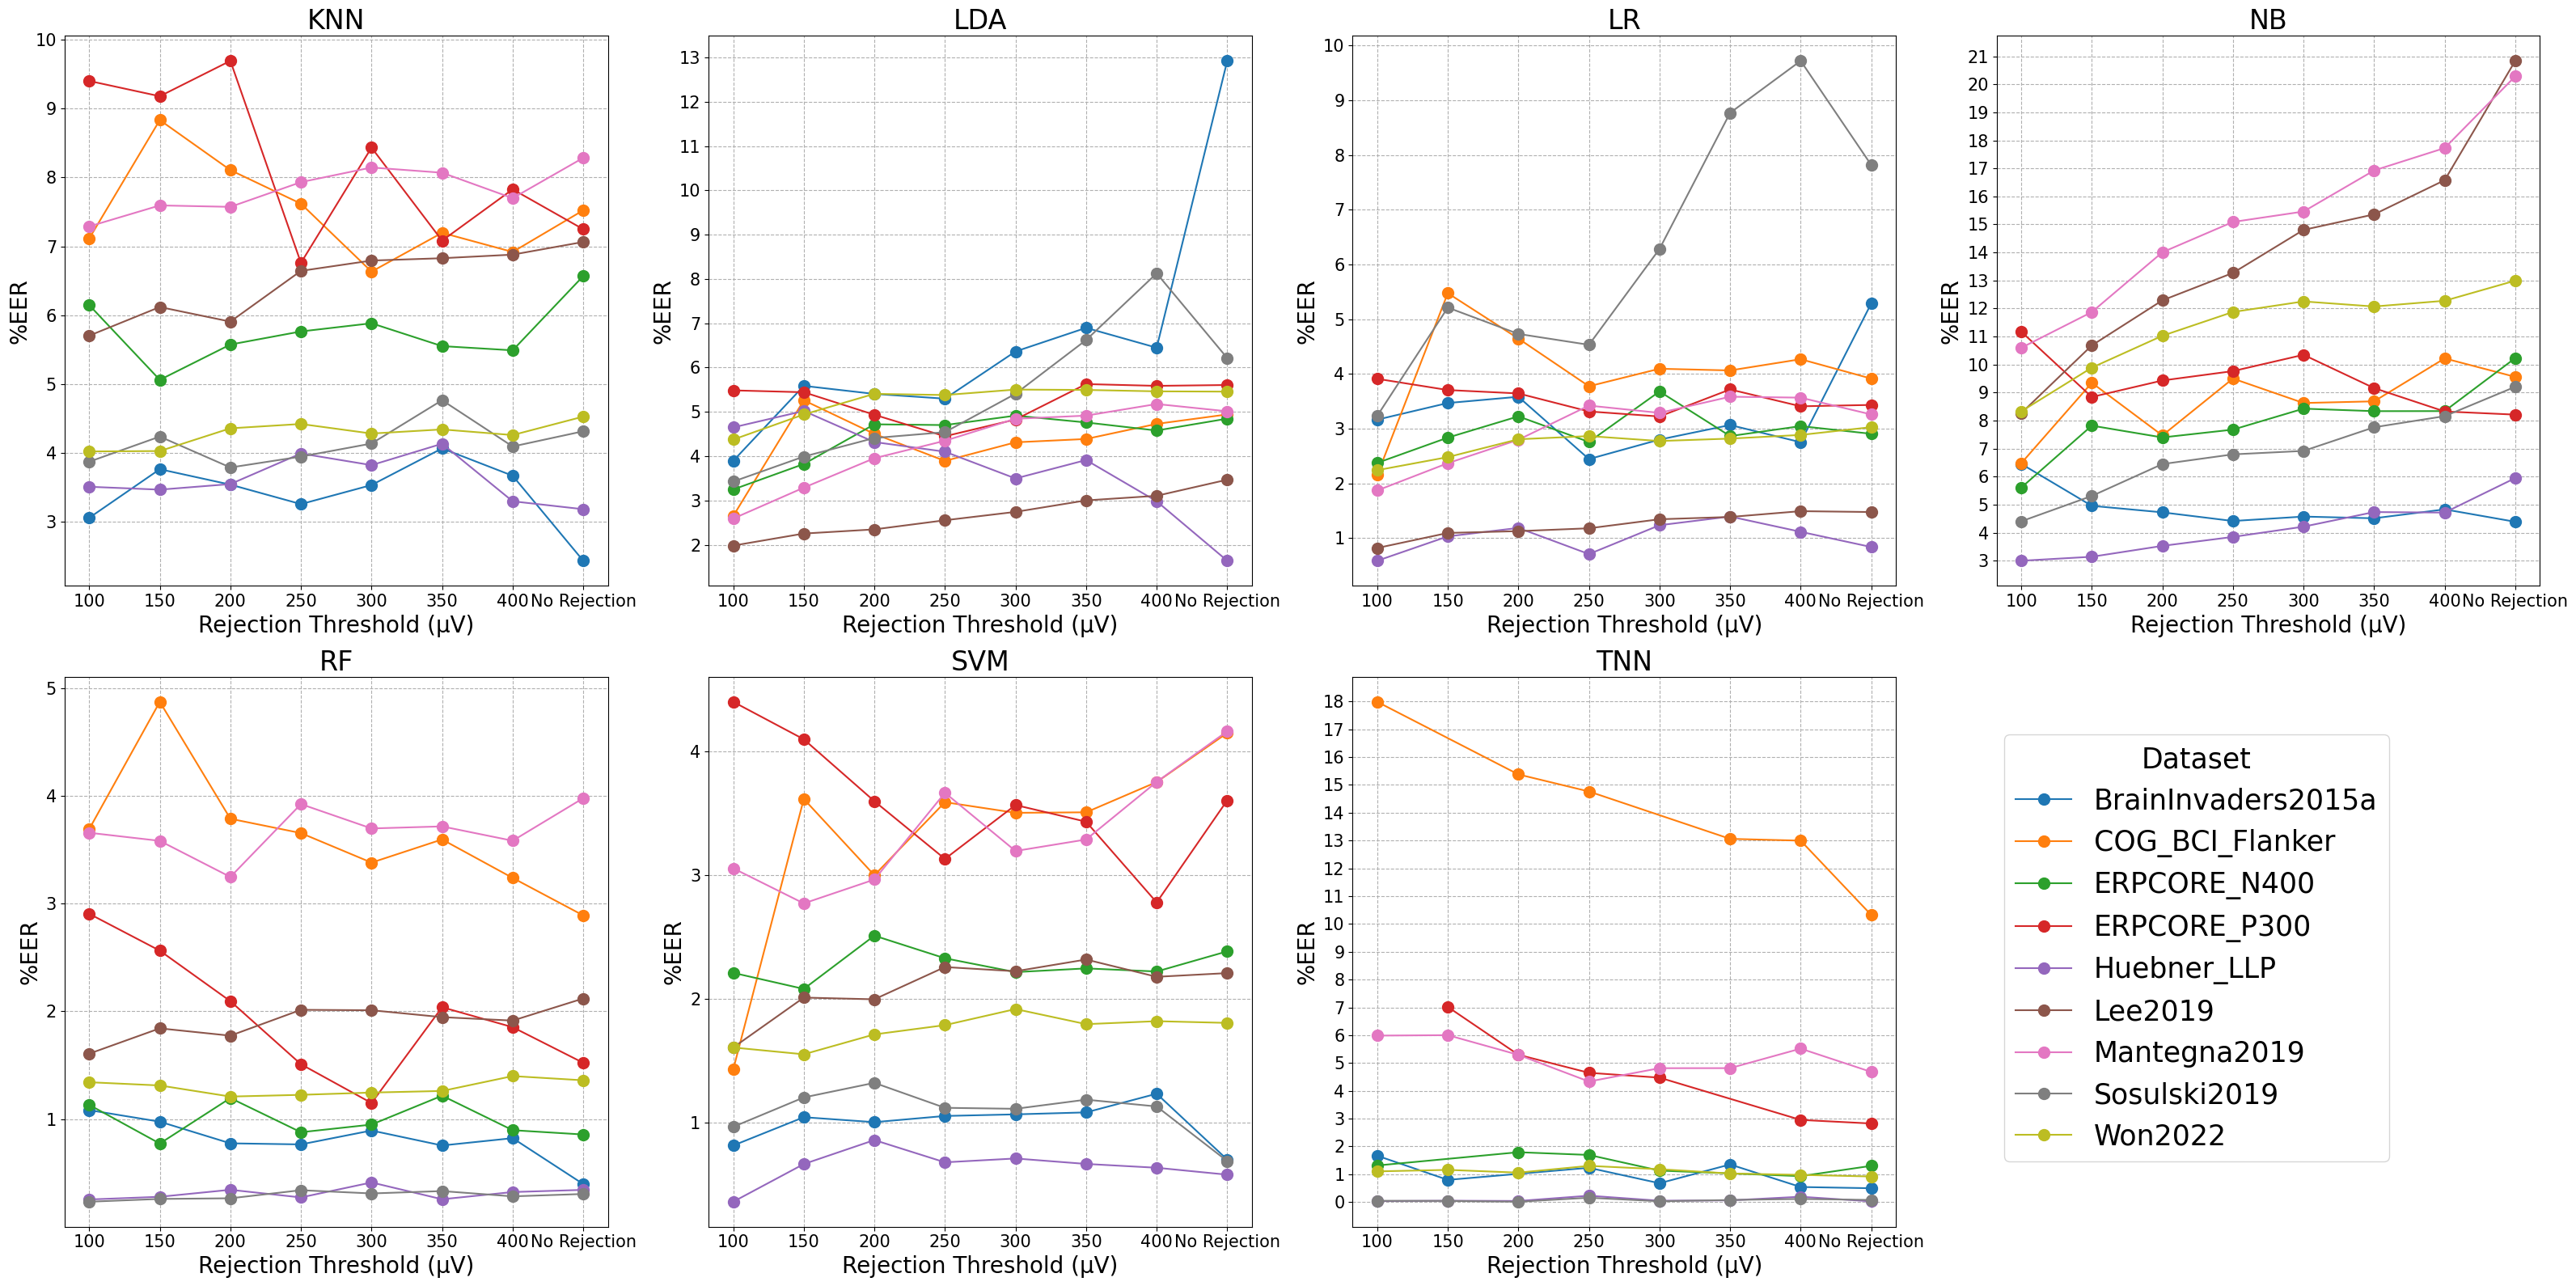

In [533]:
#import matplotlib.pyplot as plt

# Create subplots for each pipeline
fig, axs = plt.subplots(2,4, figsize=(32, 16))
fig.tight_layout(pad=3.0)

#print(fig.)

# Flatten the 2D array of subplots for easy iteration
axs = axs.flatten()

# Create an empty list to store legend handles and labels
legend_handles = []

# Define dataset colors
dataset_colors = {
    'BrainInvaders2015a': 'blue',  # Dark blue
    'COG_BCI_Flanker': '#ff7f0e',  # Dark orange
    'ERPCORE_N400': '#DDCC77',  # Dark brown
    'ERPCORE_P300': '#e377c2',  # Dark pink
    'Huebner_LLP': '#2ca02c',  # Dark green
    'Lee2019': '#d62728',  # Dark red
    'Mantegna2019': '#7f7f7f',  # Dark gray
    'Sosulski2019': '#80b1d3',  # Dark purple
    'Won2022': '#bc80bd'  # Olive
}

legend_order = ["BrainInvaders2015a", "COG_BCI_Flanker", "ERPCORE_N400", "ERPCORE_P300", "Huebner_LLP", "Lee2019", "Mantegna2019", "Sosulski2019", "Won2022"]

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_epochs_rejection_df.pipeline.unique()):
    if i < len(axs):
        db = grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline'] == pipeline]
        db['eer'] = db['eer'].astype('float64')

        # Choose the subplot for the current pipeline
        ax = axs[i]

        for dataset in legend_order:
            #print("dataset", dataset)
            
#             # Check if there are enough subplots for the pipelines
#             print("dataset", dataset)
#             print("dataset color", dataset_colors[dataset])
#             print("============================================")
            dataset_data = db[db['dataset'] == dataset]
            line, = ax.plot(dataset_data['Rejection_Threshold'], dataset_data['eer'], marker='o', 
                    markersize=10, label=dataset)
            #print(line)
            legend_handles.append(line)
            
#             # Add error bars to the line plot
#             ax.errorbar(dataset_data['Rejection_Threshold'], dataset_data['eer'], yerr=dataset_data['eer'], fmt='none', capsize=8)

        # Set labels and title

        # Set labels and title
        ax.set_xlabel('Rejection Threshold (µV)', fontsize=20)
        ax.set_ylabel('%EER', fontsize=20)
        ax.set_title(pipeline, fontsize=24)
        
        ax.tick_params(axis='both', labelsize=15, colors='black')
        
        
        # Modify x-axis ticks
        ax.set_xticks([100, 150, 200, 250, 300, 350, 400, 450])
        ax.set_xticklabels([100, 150, 200, 250, 300, 350, 400, "No Rejection"])
        
#         ax.set_ylim(0, 10)
#         ax.set_yticks(range(0, 11, 1))

        # Set y-axis ticks at intervals of 1
        ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
        ax.grid(True, ls="--", lw=0.8)
        
#print(set(grouped_epochs_rejection_df['dataset']))

# Create a legend outside the subplots
fig.legend(legend_handles, legend_order, bbox_to_anchor=(0.93, 0.44), fontsize=12, prop={'size': 25}, title="Dataset", title_fontsize=25)
plt.subplots_adjust(right=0.80) 
# Adjust layout to make room for the legend

# Adjust layout
plt.tight_layout()
fig.delaxes(axs[7])
plt.savefig('/Users/avinashkumarchaurasia/Desktop/project/BrainModels/Plots/Experiment_Pre_Processing/Epochs_Rejection/Effects_of_Epochs_rejection.pdf', bbox_inches="tight")
plt.show()